# Visualisation des parties angulaires des OA de H

### But: 
Utiliser l'outil numérique pour visualiser la forme des parties angulaires des OA de H. 

C'est l'occasion de réfléchir au tracé d'une courbe ne coordonnées polaires.

### Imports de librairies 
Ne pas oublier de faire tourner cette cellule avant de lancer les cellules successives qui contiendront votre code

In [34]:
import  numpy  as  np
import  matplotlib.pyplot  as  plt
%matplotlib inline 
#matplotlin inline permet l'affichage graphique dans jupyter

a_0 = 0.529 #en pm, rayon de Bohr, variable globale    

### Forme des OA 2p

On rappelle les expressions des parties radiales et angulaires des OA $2p_x$, $2p_y$ et $2p_z$. Ces fonctions sont à valeurs réelles et résultent de combinaisons linéaires des solutions de l'équation de Schrödinger.

$$R_{2p_x}(r)= R_{2p_y}(r) = R_{2p_z}(r) = \frac{1}{2\, \sqrt{6}} {a_0}^{-\frac{3}{2}}  \left(\frac{r}{a_0}\right) \exp \left( -\frac{r}{2\, a_0} \right)  $$

$$ Y_{2p_x} = \sqrt{\frac{3}{4\pi}} \sin\theta \cos\varphi $$
$$ Y_{2p_y} = \sqrt{\frac{3}{4\pi}} \sin\theta \sin \varphi $$
$$ Y_{2p_z} = \sqrt{\frac{3}{4\pi}} \cos \theta$$

#### 1) Question de cours (à faire sur papier après la séance)
Donner les équations de correspondance entre les coordonnées cartésiennes $x,y,z$ et les coordonnées sphériques $r,\theta,\varphi$. 

En déduire l'origine des l'appellations $2p_x$, $2p_y$ et $2p_z$.


#### 2) OA 2pz
**a)** On souhaite représenter en 2D la partie angulaire $Y_{2p_z}(\theta,\varphi)$ de l'OA $2p_z$ dans le plan $\varphi = 0$. Il s'agit donc de tracer une courbe en coordonnées polaires dans le plan cartésien $xOz$.

On pourra se reporter à https://cahier-de-prepa.fr/mp1-janson/download?id=526 en page 16 pour l'utilisation de la fonction `polar` du module `matplotlib` sous la forme `plt.polar(Theta,R)` où `Theta` est une liste ou un array 1D des valeurs de l'angle $\theta$ et `R` la liste ou l'array 1D des valeurs $r = f(\theta)$ associées.

Compléter le code ci-dessous.

*Astuce*: penser à prendre la valeur absolue de la partie angulaire, car les valeurs négatives ne se représentent pas bien en coordonnées polaires.

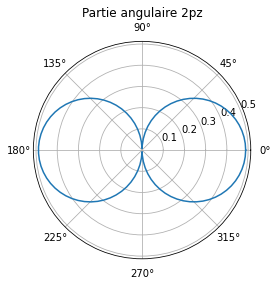

In [35]:
from matplotlib.projections import PolarAxes

def Y_2pz (theta):
    angulaire = np.sqrt(3/(4 * np.pi)) * np.cos(theta)
    return angulaire


Theta = np.linspace(0,2*np.pi,100) #génère liste de points équiespacés entre 0 et 2pi.
Y_1zvalues = [np.absolute(Y_2pz(t)) for t in Theta]
fig = plt.figure()
plt.polar(Theta, Y_1zvalues)
plt.title('Partie angulaire 2pz')
plt.show()

#### 2) 
**b)** À partir de l'expression de $ Y_{2p_z}$, démontrer que la courbe tracée précédemment en coordonnées polaires correspond à deux cercles.

*Astuce*: une démonstration possible utilise le fait qu'un triangle constitué du diamètre d'un cercle et d'un point du cercle est rectangle.

#### 2)  
**c)** 
Représenter en 2D le carré de la partie angulaire, $Y^2_{2p_z}(\theta,\varphi)$ dans le plan $\varphi = 0$. C'est cette fonction qui donne la forme de l'OA que l'on dessine dans les dessins conventionnels.

Votre code:

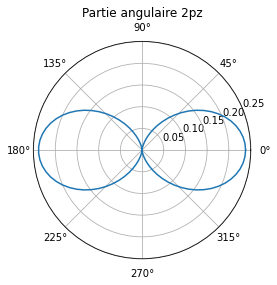

In [36]:
def Y2_2pz (theta):
    angulaire2 = np.square(Y_2pz (theta))
    return angulaire2


Theta = np.linspace(0,2*np.pi,100) #génère liste de points équiespacés entre 0 et 2pi.
Y2_1zvalues = [Y2_2pz(t) for t in Theta]
fig = plt.figure()
plt.polar(Theta, Y2_1zvalues)
plt.title('Partie angulaire 2pz')
plt.show()

### Forme des OA 3d

En utilisant les expressions du tableau du cours, représenter une ou plusieurs des parties angulaires au carré des OA $Y_{3d}(\theta,\varphi)$.

Votre code:

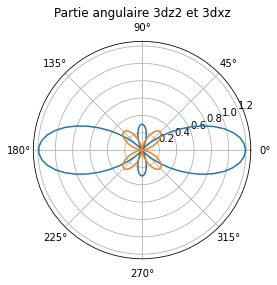

In [37]:
def Y2_3dz2 (theta,phi):
    angulaire = np.square((3*np.square(np.cos(theta))-1)*np.sqrt(15)/(4*np.sqrt(np.pi)))
    return angulaire

def Y2_3dxz (theta,phi):
    angulaire = np.square((np.sin(2*theta)*np.cos(phi)*np.sqrt(15)/(4*np.sqrt(np.pi))))
    return angulaire

Theta = np.linspace(0,2*np.pi,100) #génère liste de points équiespacés entre 0 et 2pi.
Y_valuesz2 = [np.absolute(Y2_3dz2(t,0)) for t in Theta]
Y_valuesxz = [np.absolute(Y2_3dxz(t,0)) for t in Theta]
fig = plt.figure()
plt.polar(Theta, Y_valuesz2)
plt.polar(Theta, Y_valuesxz)
plt.title('Partie angulaire 3dz2 et 3dxz')
plt.show()

Analyser les propriétés (plans nodaux, signe de la partie angulaire) de(s) OA représentées.

Votre réponse:

### Représentation d'une partie angulaire d'une OA  en 3D

Le code ci-dessous représente la partie angulaire de OA $Y_{2p_z}(\theta,\varphi)$. Vous pouvez vous entrainer à représenter d'autres parties angulaires en 3D.

*Note*: la figure ne tourne pas sous notebook. Transférer le code dans un IDE python pour pouvoir la manipuler.

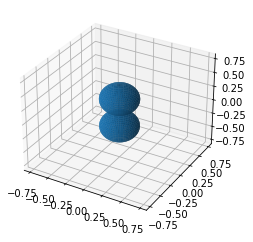

In [38]:
from mpl_toolkits.mplot3d import axes3d

phi,theta = np.mgrid[0:2*np.pi:200j, 0:np.pi:100j]
r = np.abs(np.sqrt(3/(4 * np.pi)) * np.cos(theta))
x = r * np.cos(phi) * np.sin(theta)
y = r * np.sin(phi) * np.sin(theta)
z = r * np.cos(theta)
fig = plt.figure()
ax = fig.gca(projection = '3d')
ax.plot_surface(x,y,z)
ax.set_xlim(-0.8,0.8)
ax.set_ylim(-0.8,0.8)
ax.set_zlim(-0.8,0.8)
plt.show()